Đang quét dữ liệu tại: h:\nam4ki1\Hocmaynangcao\..\Hocmaynangcao\Tomato ...


=== 🧮 BẢNG THỐNG KÊ SỐ LƯỢNG ẢNH ===
Split                   Test  Train  Val  Total
Class                                          
Yellow Leaf Curl Virus    49   1961  441   2451
Healthy                   49   1926  432   2407
Early Blight              48   1920  432   2400
Late Blight               47   1851  416   2314
Septoria Leaf Spot        44   1745  392   2181
Bacterial Spot            43   1702  382   2127

=== 📏 BẢNG THỐNG KÊ SIZE ẢNH ===
                     Class  Split Min Size (WxH) Max Size (WxH)  \
0           Bacterial Spot  Train     (256, 256)     (256, 256)   
1             Early Blight  Train     (256, 256)     (256, 256)   
2                  Healthy  Train     (256, 256)     (256, 256)   
3              Late Blight  Train     (256, 256)     (256, 256)   
4       Septoria Leaf Spot  Train     (256, 256)     (256, 256)   
5   Yellow Leaf Curl Virus  Train     (256, 256)     (256, 256)  

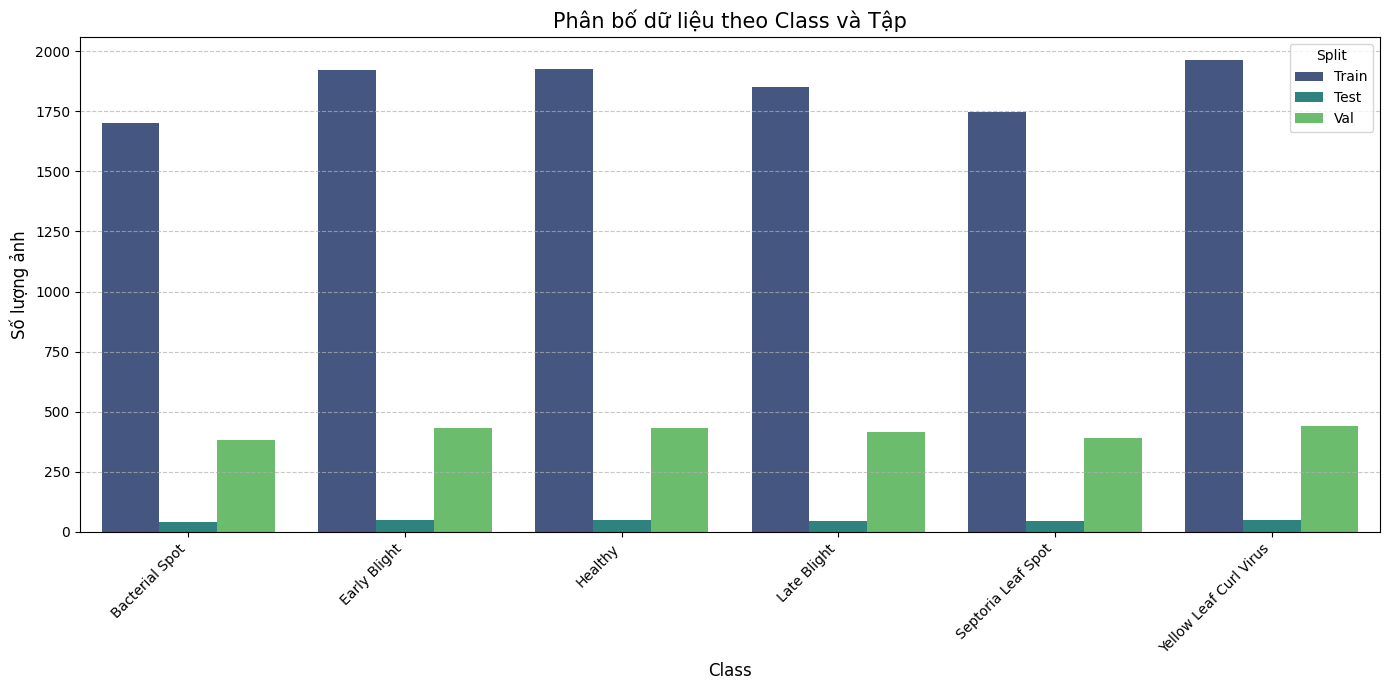

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from PIL import Image
from collections import Counter

dataset_path = "../Hocmaynangcao/Tomato/" 
root_dir = Path(dataset_path)

def analyze_split_structure(root_dir):
    splits = ['Train', 'Test', 'Val']
    data_records = []       # Lưu số lượng ảnh
    size_records = []       # Lưu kích thước ảnh

    if not root_dir.exists():
        print(f"❌ Không tìm thấy đường dẫn: {root_dir.absolute()}")
        return

    print(f"Đang quét dữ liệu tại: {root_dir.absolute()} ...\n")

    for split_name in splits:
        split_dir = root_dir / split_name
        actual_dir = None

        # Tự tìm thư mục không phân biệt hoa-thường
        if split_dir.exists():
            actual_dir = split_dir
        else:
            for d in root_dir.iterdir():
                if d.is_dir() and d.name.lower() == split_name.lower():
                    actual_dir = d
                    break

        if not actual_dir:
            print(f"⚠️ Không tìm thấy folder '{split_name}'")
            continue

        classes = [d for d in actual_dir.iterdir() if d.is_dir()]

        for class_folder in classes:
            image_files = [f for f in class_folder.glob("*")
                           if f.suffix.lower() in ['.jpg', '.jpeg', '.png', '.bmp', '.tiff']]

            count = len(image_files)
            if count == 0:
                continue

            # Ghi thống kê số lượng
            data_records.append({
                'Class': class_folder.name,
                'Split': split_name,
                'Count': count
            })

            # ❗ LẤY SIZE ẢNH
            sizes = []
            for img_path in image_files:
                try:
                    with Image.open(img_path) as img:
                        sizes.append(img.size)  # (width, height)
                except Exception as e:
                    print(f"⚠️ Lỗi đọc ảnh: {img_path} -> {e}")

            if sizes:
                # Tính size phổ biến nhất
                most_common_size = Counter(sizes).most_common(1)[0][0]
                size_records.append({
                    'Class': class_folder.name,
                    'Split': split_name,
                    'Min Size (WxH)': min(sizes),
                    'Max Size (WxH)': max(sizes),
                    'Most Common Size (WxH)': most_common_size,
                    'Unique Sizes': len(set(sizes))
                })

    # === BẢNG THỐNG KÊ SỐ LƯỢNG ===
    df = pd.DataFrame(data_records)
    pivot_df = df.pivot_table(index='Class', columns='Split', values='Count',
                              aggfunc='sum', fill_value=0)
    pivot_df['Total'] = pivot_df.sum(axis=1)
    pivot_df = pivot_df.sort_values(by='Total', ascending=False)

    print("\n=== 🧮 BẢNG THỐNG KÊ SỐ LƯỢNG ẢNH ===")
    print(pivot_df)

    # === BẢNG THỐNG KÊ KÍCH THƯỚC ===
    if size_records:
        size_df = pd.DataFrame(size_records)
        print("\n=== 📏 BẢNG THỐNG KÊ SIZE ẢNH ===")
        print(size_df)

        # Thông báo nếu có class có size không đồng nhất
        prob = size_df[size_df["Unique Sizes"] > 1]
        if len(prob) > 0:
            print("\n⚠️ Những lớp có ảnh size KHÔNG ĐỒNG NHẤT (có thể gây lỗi khi train):")
            print(prob[['Class', 'Split', 'Unique Sizes', 'Most Common Size (WxH)']])

    # === BIỂU ĐỒ ===
    try:
        plt.figure(figsize=(14, 7))
        sns.barplot(data=df, x='Class', y='Count', hue='Split', palette='viridis')
        plt.title('Phân bố dữ liệu theo Class và Tập', fontsize=15)
        plt.xlabel('Class', fontsize=12)
        plt.ylabel('Số lượng ảnh', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print("❌ Lỗi vẽ biểu đồ:", e)


# RUN
analyze_split_structure(root_dir)


TensorFlow Version: 2.20.0
Num GPUs Available:  0
Đọc dữ liệu từ: h:\nam4ki1\Hocmaynangcao\Tomato
Found 11108 files belonging to 6 classes.
Found 2495 files belonging to 6 classes.
Found 280 files belonging to 6 classes.
Số lượng lớp: 6
Các lớp: ['Bacterial Spot', 'Early Blight', 'Healthy', 'Late Blight', 'Septoria Leaf Spot', 'Yellow Leaf Curl Virus']


Model: "EfficientNetB0_Custom"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential          │ (None, 256, 256,  │          0 │ input_layer_2[0]… │
│ (Sequential)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_2         │ (None, 256, 256,  │          0 │ sequential[0][0]  │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_1     │ (None, 256, 256,  │          7 │ rescaling_2[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_3         │ (None, 256, 256,  │          0 │ normalization_1[… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 257, 257,  │          0 │ rescaling_3[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 128, 128,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 128, 128,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 128, 128,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 128, 128,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 128, 128,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 128, 128,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 128, 128,  │          0 │ block1a_activati

 Total params: 4,062,377 (15.50 MB)

 Trainable params: 10,246 (40.02 KB)

 Non-trainable params: 4,052,131 (15.46 MB)

Epoch 1/20
348/348 ━━━━━━━━━━━━━━━━━━━━ 0s 884ms/step - accuracy: 0.7165 - loss: 0.8056
Epoch 1: val_accuracy improved from None to 0.92545, saving model to best_tomato_model.keras
348/348 ━━━━━━━━━━━━━━━━━━━━ 427s 1s/step - accuracy: 0.8337 - loss: 0.4741 - val_accuracy: 0.9255 - val_loss: 0.2423 - learning_rate: 0.0010
Epoch 2/20
348/348 ━━━━━━━━━━━━━━━━━━━━ 0s 831ms/step - accuracy: 0.9187 - loss: 0.2289
Epoch 2: val_accuracy improved from 0.92545 to 0.94349, saving model to best_tomato_model.keras
348/348 ━━━━━━━━━━━━━━━━━━━━ 351s 1s/step - accuracy: 0.9246 - loss: 0.2165 - val_accuracy: 0.9435 - val_loss: 0.1632 - learning_rate: 0.0010
Epoch 3/20
348/348 ━━━━━━━━━━━━━━━━━━━━ 0s 851ms/step - accuracy: 0.9358 - loss: 0.1893
Epoch 3: val_accuracy improved from 0.94349 to 0.95351, saving model to best_tomato_model.keras
348/348 ━━━━━━━━━━━━━━━━━━━━ 357s 1s/step - accuracy: 0.9385 - loss: 0.1797 - val_accuracy: 0.9535 - val_loss: 0.1406 - learning_rate: 0.0010
Epoch 4/20
348/348 ━━━━━━

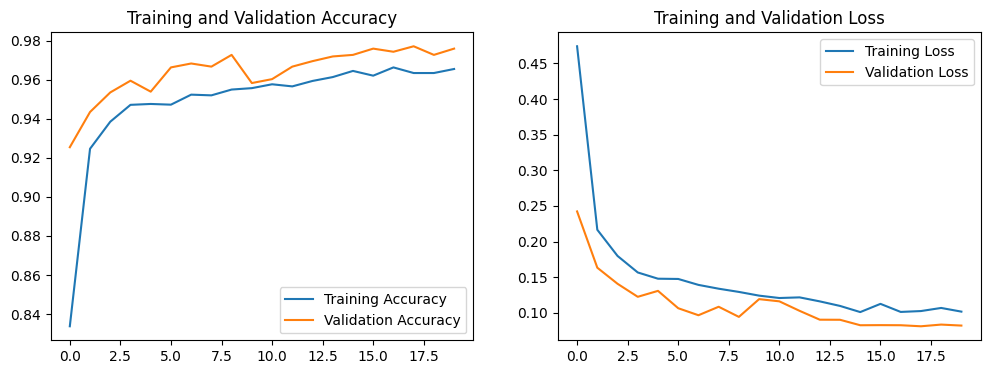

Đã lưu model thành công!

--- Đánh giá trên tập TEST ---
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 738ms/step - accuracy: 0.9679 - loss: 0.0992
Test Accuracy: 0.9679


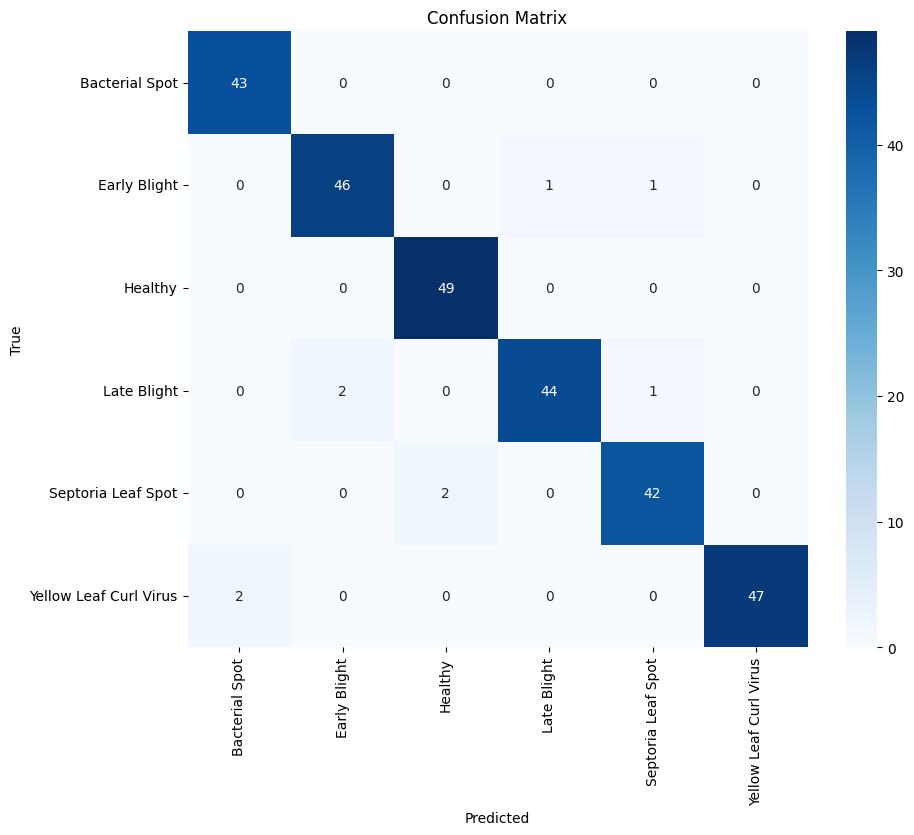


Classification Report:

                        precision    recall  f1-score   support

        Bacterial Spot       0.96      1.00      0.98        43
          Early Blight       0.96      0.96      0.96        48
               Healthy       0.96      1.00      0.98        49
           Late Blight       0.98      0.94      0.96        47
    Septoria Leaf Spot       0.95      0.95      0.95        44
Yellow Leaf Curl Virus       1.00      0.96      0.98        49

              accuracy                           0.97       280
             macro avg       0.97      0.97      0.97       280
          weighted avg       0.97      0.97      0.97       280



In [4]:
# ==========================================
# 1. IMPORT THƯ VIỆN
# ==========================================
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.applications import EfficientNetB0
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Kiểm tra GPU
print(f"TensorFlow Version: {tf.__version__}")
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# ==========================================
# 2. CÀI ĐẶT DATASET
# ==========================================
# Cấu hình tham số
IMG_SIZE = 256
BATCH_SIZE = 32
EPOCHS = 20
LEARNING_RATE = 0.001
DATASET_PATH = "../Hocmaynangcao/Tomato/"

# Đường dẫn cụ thể
train_dir = os.path.join(DATASET_PATH, 'Train')
val_dir = os.path.join(DATASET_PATH, 'Val')
test_dir = os.path.join(DATASET_PATH, 'Test')

print(f"Đọc dữ liệu từ: {os.path.abspath(DATASET_PATH)}")

# ==========================================
# 3. DATA AUGMENTATION VỚI PREPROCESSING CHUẨN
# ==========================================

# Load dữ liệu bằng image_dataset_from_directory
# Label_mode='categorical' để dùng one-hot encoding
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    label_mode='categorical',
    shuffle=True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    label_mode='categorical',
    shuffle=False
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    label_mode='categorical',
    shuffle=False
)

# Lấy tên các class
class_names = train_ds.class_names
num_classes = len(class_names)
print(f"Số lượng lớp: {num_classes}")
print(f"Các lớp: {class_names}")

# Định nghĩa lớp Augmentation (Tăng cường dữ liệu)
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
])

# Tối ưu hóa hiệu năng (Prefetching)
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

# ==========================================
# 4. TẠO MODEL EFFICIENTNET-B0
# ==========================================
def build_model(num_classes):
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    
    # Áp dụng Augmentation ngay trong model
    x = data_augmentation(inputs)
    
    # Load EfficientNetB0 (Pre-trained on ImageNet)
    # Lưu ý: EfficientNetB0 đã có sẵn lớp Rescaling/Normalization bên trong
    base_model = EfficientNetB0(include_top=False, weights='imagenet', input_tensor=x)
    
    # Đóng băng (Freeze) base model để không train lại các weight có sẵn
    base_model.trainable = False 
    
    # Rebuild top layers
    x = layers.GlobalAveragePooling2D()(base_model.output)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.2)(x)  # Giảm overfitting
    
    outputs = layers.Dense(num_classes, activation='softmax', name="pred")(x)

    model = models.Model(inputs, outputs, name="EfficientNetB0_Custom")
    
    # Compile model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = build_model(num_classes)
model.summary()

# ==========================================
# 5. TRAINING (CALLBACKS & FIT)
# ==========================================
# Thiết lập Callbacks
checkpoint = callbacks.ModelCheckpoint(
    "best_tomato_model.keras", 
    save_best_only=True, 
    monitor='val_accuracy', 
    mode='max',
    verbose=1
)

early_stopping = callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=5, 
    restore_best_weights=True,
    verbose=1
)

reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.2, 
    patience=3, 
    min_lr=1e-6,
    verbose=1
)

# Bắt đầu training
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=[checkpoint, early_stopping, reduce_lr]
)

# ==========================================
# 6. VISUALIZE TRAINING HISTORY
# ==========================================
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

plot_history(history)

# ==========================================
# 7. LƯU MODEL
# ==========================================
# Lưu model định dạng Keras mới (nhẹ và nhanh hơn h5 cũ)
model.save("Tomato_EfficientNetB0_Final.keras")
print("Đã lưu model thành công!")

# ==========================================
# 8. ĐÁNH GIÁ MODEL
# ==========================================
print("\n--- Đánh giá trên tập TEST ---")
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Accuracy: {test_acc:.4f}")

# Dự đoán để vẽ Confusion Matrix
y_pred = [] # Nhãn dự đoán
y_true = [] # Nhãn thực tế

# Duyệt qua tập test để lấy dữ liệu (vì test_ds là dạng batch)
for images, labels in test_ds:
    preds = model.predict(images, verbose=0)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(np.argmax(labels.numpy(), axis=1))

# Vẽ Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# In báo cáo chi tiết
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

🚀 CHƯƠNG TRÌNH DỰ ĐOÁN BỆNH CÀ CHUA
📥 Đang load model đã train...
✅ Đã load model từ: Tomato_EfficientNetB0_Final.keras
📥 Đang load class names...
Found 280 files belonging to 6 classes.
✅ Đã load model từ: Tomato_EfficientNetB0_Final.keras
📥 Đang load class names...
Found 280 files belonging to 6 classes.
✅ Đã load class_names từ dataset
📏 Image size: 256x256
📝 Classes: ['Bacterial Spot', 'Early Blight', 'Healthy', 'Late Blight', 'Septoria Leaf Spot', 'Yellow Leaf Curl Virus']

✅ Đã load class_names từ dataset
📏 Image size: 256x256
📝 Classes: ['Bacterial Spot', 'Early Blight', 'Healthy', 'Late Blight', 'Septoria Leaf Spot', 'Yellow Leaf Curl Virus']

🖱️  Vui lòng chọn ảnh từ hộp thoại...
🖱️  Vui lòng chọn ảnh từ hộp thoại...
✅ Đã chọn: 2b526b63-b759-4187-ab73-ce49ebb07191___JR_Sept.L.S 2681.JPG

✅ Đã chọn: 2b526b63-b759-4187-ab73-ce49ebb07191___JR_Sept.L.S 2681.JPG



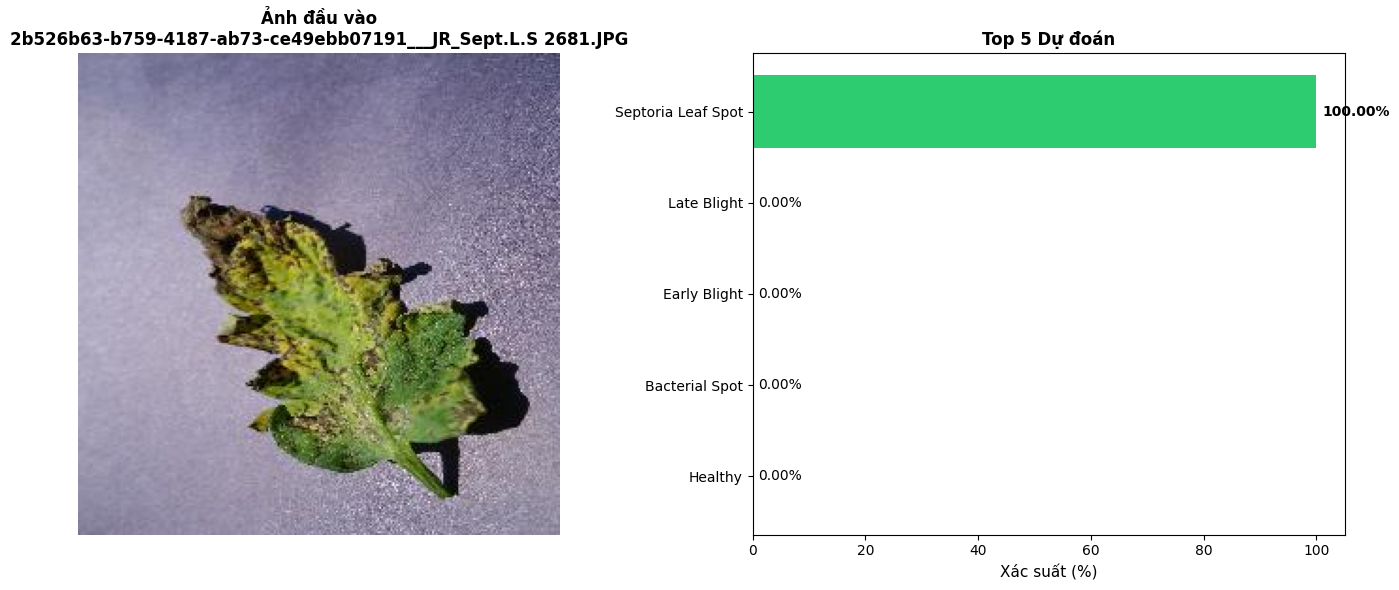

🎯 KẾT QUẢ DỰ ĐOÁN
📸 Ảnh: 2b526b63-b759-4187-ab73-ce49ebb07191___JR_Sept.L.S 2681.JPG
🏆 Dự đoán: Septoria Leaf Spot
📊 Độ tin cậy: 100.00%

📋 Top 5 dự đoán:
   1. Septoria Leaf Spot: 100.00%
   2. Late Blight: 0.00%
   3. Early Blight: 0.00%
   4. Bacterial Spot: 0.00%
   5. Healthy: 0.00%

💡 Muốn dự đoán ảnh khác? Chạy lại cell này!


In [2]:
# ==========================================
# 10. GIAO DIỆN CHỌN ẢNH VÀ DỰ ĐOÁN
# ==========================================
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tkinter import Tk, filedialog

# ==========================================
# LOAD MODEL VÀ CLASS NAMES
# ==========================================
def load_model_and_classes():
    """Load model và class names"""
    global model, class_names, IMG_SIZE
    
    try:
        # Kiểm tra xem model đã tồn tại chưa
        model.summary()
        print("✅ Đang sử dụng model từ session hiện tại")
    except:
        # Nếu chưa có model, load từ file
        print("📥 Đang load model đã train...")
        model_paths = [
            "Tomato_EfficientNetB0_Final.keras",
            "best_tomato_model.keras"
        ]
        
        model = None
        for model_path in model_paths:
            if os.path.exists(model_path):
                model = tf.keras.models.load_model(model_path)
                print(f"✅ Đã load model từ: {model_path}")
                break
        
        if model is None:
            raise FileNotFoundError(
                "❌ Không tìm thấy model! Vui lòng chạy cell training trước."
            )
    
    # Load class_names
    try:
        class_names
        print(f"✅ Class names: {class_names}")
    except:
        print("📥 Đang load class names...")
        
        # Thử load từ file JSON
        if os.path.exists('models/class_names.json'):
            import json
            with open('models/class_names.json', 'r') as f:
                class_names = json.load(f)
            print(f"✅ Đã load class_names từ file")
        else:
            # Lấy từ dataset
            DATASET_PATH = "../Hocmaynangcao/Tomato/"
            test_dir = os.path.join(DATASET_PATH, 'Test')
            
            temp_ds = tf.keras.utils.image_dataset_from_directory(
                test_dir,
                image_size=(256, 256),
                batch_size=32,
                label_mode='categorical',
                shuffle=False
            )
            class_names = temp_ds.class_names
            print(f"✅ Đã load class_names từ dataset")
    
    IMG_SIZE = model.input_shape[1]
    print(f"📏 Image size: {IMG_SIZE}x{IMG_SIZE}")
    print(f"📝 Classes: {class_names}")
    print()
    
    return model, class_names, IMG_SIZE

# ==========================================
# HÀM CHỌN VÀ DỰ ĐOÁN ẢNH
# ==========================================
def predict_image_with_dialog():
    """
    Mở hộp thoại cho người dùng chọn ảnh và hiển thị dự đoán
    """
    # Load model nếu chưa có
    try:
        model, class_names, IMG_SIZE = load_model_and_classes()
    except Exception as e:
        print(f"❌ Lỗi: {e}")
        return
    
    # Tạo cửa sổ Tkinter ẩn
    root = Tk()
    root.withdraw()  # Ẩn cửa sổ chính
    root.attributes('-topmost', True)  # Đưa dialog lên trên cùng
    
    print("🖱️  Vui lòng chọn ảnh từ hộp thoại...")
    
    # Mở hộp thoại chọn file
    file_path = filedialog.askopenfilename(
        title="Chọn ảnh để dự đoán",
        filetypes=[
            ("Image files", "*.jpg *.jpeg *.png *.bmp *.tiff"),
            ("All files", "*.*")
        ]
    )
    
    root.destroy()  # Đóng cửa sổ Tkinter
    
    if not file_path:
        print("❌ Không có ảnh nào được chọn!")
        return
    
    print(f"✅ Đã chọn: {os.path.basename(file_path)}\n")
    
    # Load và tiền xử lý ảnh
    try:
        img = image.load_img(file_path, target_size=(IMG_SIZE, IMG_SIZE))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        
        # Dự đoán
        predictions = model.predict(img_array, verbose=0)
        predicted_class_idx = np.argmax(predictions[0])
        confidence = predictions[0][predicted_class_idx] * 100
        
        # Hiển thị kết quả
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
        
        # Hiển thị ảnh
        ax1.imshow(img)
        ax1.axis('off')
        ax1.set_title(f'Ảnh đầu vào\n{os.path.basename(file_path)}', 
                     fontsize=12, fontweight='bold')
        
        # Hiển thị biểu đồ xác suất
        top_5_idx = np.argsort(predictions[0])[-5:][::-1]
        top_5_probs = predictions[0][top_5_idx] * 100
        top_5_labels = [class_names[i] for i in top_5_idx]
        
        colors = ['#2ecc71' if i == 0 else '#3498db' for i in range(5)]
        bars = ax2.barh(range(5), top_5_probs, color=colors)
        ax2.set_yticks(range(5))
        ax2.set_yticklabels(top_5_labels)
        ax2.set_xlabel('Xác suất (%)', fontsize=11)
        ax2.set_title('Top 5 Dự đoán', fontsize=12, fontweight='bold')
        ax2.invert_yaxis()
        
        # Thêm phần trăm vào các thanh
        for i, (bar, prob) in enumerate(zip(bars, top_5_probs)):
            ax2.text(prob + 1, i, f'{prob:.2f}%', 
                    va='center', fontsize=10, fontweight='bold' if i == 0 else 'normal')
        
        plt.tight_layout()
        plt.show()
        
        # In kết quả
        print("=" * 60)
        print(f"🎯 KẾT QUẢ DỰ ĐOÁN")
        print("=" * 60)
        print(f"📸 Ảnh: {os.path.basename(file_path)}")
        print(f"🏆 Dự đoán: {class_names[predicted_class_idx]}")
        print(f"📊 Độ tin cậy: {confidence:.2f}%")
        print("\n📋 Top 5 dự đoán:")
        for i, (idx, prob) in enumerate(zip(top_5_idx, top_5_probs), 1):
            print(f"   {i}. {class_names[idx]}: {prob:.2f}%")
        print("=" * 60)
        
    except Exception as e:
        print(f"❌ Lỗi khi xử lý ảnh: {e}")

# ==========================================
# CHẠY CHƯƠNG TRÌNH
# ==========================================
print("=" * 60)
print("🚀 CHƯƠNG TRÌNH DỰ ĐOÁN BỆNH CÀ CHUA")
print("=" * 60)
predict_image_with_dialog()

# Hỏi người dùng có muốn tiếp tục không
print("\n💡 Muốn dự đoán ảnh khác? Chạy lại cell này!")